   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000
Area=3300 Price=[628715.75342466]
-------------------------------------------------------------------------------------------
[135.78767123]
-------------------------------------------------------------------------------------------
180616.43835616432
-------------------------------------------------------------------------------------------
Area=5000 Price=[859554.79452055]
-------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


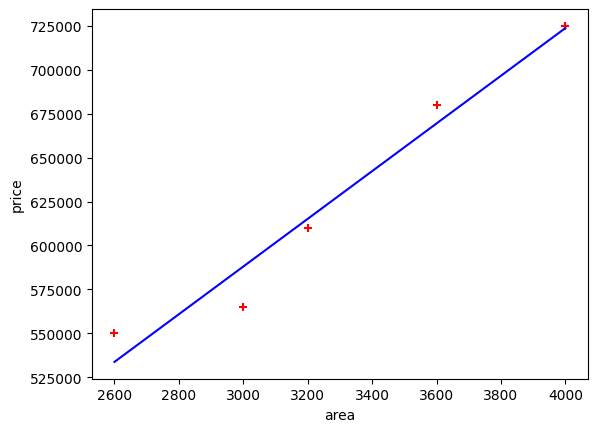

In [20]:
#Housing_area_price

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('/content/housing_area_price.csv')
print(df)

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

new_df = df.drop('price',axis='columns')
# print(new_df)
# print("-------------------------------------------------------------------------------------------")
price = df.price
# print(price)
# print("-------------------------------------------------------------------------------------------")

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)


"""(1) Predict price of a home with area = 3300 sqr ft"""

print(f'Area=3300 Price={reg.predict([[3300]])}')
print("-------------------------------------------------------------------------------------------")
print(reg.coef_)
print("-------------------------------------------------------------------------------------------")

print(reg.intercept_)
print("-------------------------------------------------------------------------------------------")

# """Y = m * X + b (m is coefficient and b is intercept)"""

# 3300*135.78767123 + 180616.43835616432

# """(1) Predict price of a home with area = 5000 sqr ft"""

print(f'Area=5000 Price={reg.predict([[5000]])}')
print("-------------------------------------------------------------------------------------------")
plt.plot(df.area, reg.predict(new_df), color='blue')
plt.show()

   year       Income
0  1970  3399.299037
1  1971  3768.297935
2  1972  4251.175484
3  1973  4804.463248
4  1974  5576.514583
year      0
Income    0
dtype: int64
Year=2020, Predicted Income=$41,288.69
Year=2027, Predicted Income=$47,087.95
-------------------------------------------------------------------------------------------
Coefficient (m): 828.47
-------------------------------------------------------------------------------------------
Intercept (b): -1,632,210.76
-------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


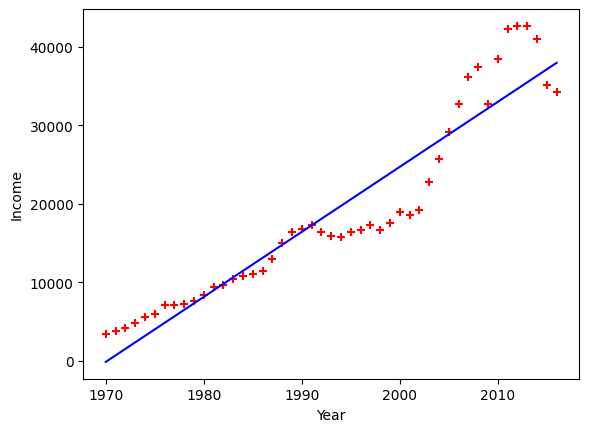

In [43]:
#canada_per_capita_income.csv
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('/content/canada_per_capita_income.csv')
print(df.head())
print(df.isnull().sum()                                                                                                                                                                                                                                                                                                                                )
df.dropna(inplace=True)


plt.xlabel('Year')
plt.ylabel('Income')
plt.scatter(df.year, df.Income, color='red', marker='+')

# Prepare input feature
X = df[['year']]  # Independent variable
y = df['Income']  # Dependent variable (what we want to predict)

# Train linear regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Predict future incomes
year_2020 = reg.predict([[2020]])[0]
year_2027 = reg.predict([[2027]])[0]

print(f'Year=2020, Predicted Income=${year_2020:,.2f}')
print(f'Year=2027, Predicted Income=${year_2027:,.2f}')
print("-------------------------------------------------------------------------------------------")
print(f'Coefficient (m): {reg.coef_[0]:,.2f}')
print("-------------------------------------------------------------------------------------------")
print(f'Intercept (b): {reg.intercept_:,.2f}')
print("-------------------------------------------------------------------------------------------")

# Plot regression line
plt.plot(df.year, reg.predict(X), color='blue')
plt.show()


   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
YearsExperience    2
Salary             0
dtype: int64
YearsExperience    0
Salary             0
dtype: int64
---------------------------------
YearsExperience=12, Predicted Income=$139,980.89
-------------------------------------------------------------------------------------------
Coefficient (m): 9,398.64
-------------------------------------------------------------------------------------------
Intercept (b): 27,197.20
-------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


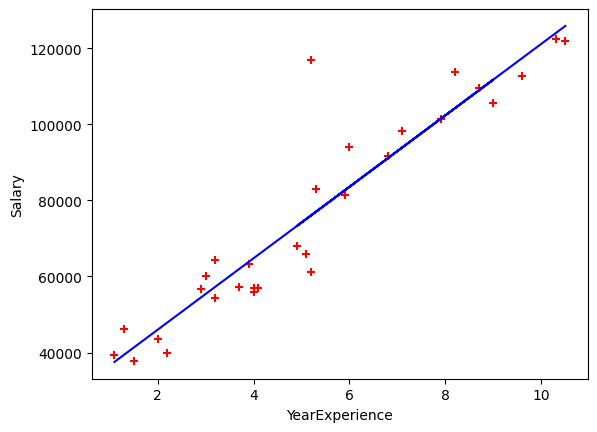

In [31]:
#salary.csv
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('/content/salary.csv')
print(df.head())

print(df.isnull().sum())
df.fillna(df['YearsExperience'].mean(),inplace=True)
print(df.isnull().sum())
print("---------------------------------")

plt.xlabel('YearExperience')
plt.ylabel('Salary')
plt.scatter(df.YearsExperience, df.Salary, color='red', marker='+')

# Prepare input feature
X = df[['YearsExperience']]  # Independent variable
y = df['Salary']  # Dependent variable

# Train linear regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Predict future incomes
year12= reg.predict([[12]])[0]
# year_2027 = reg.predict([[2027]])[0]

print(f'YearsExperience=12, Predicted Income=${year12:,.2f}')
print("-------------------------------------------------------------------------------------------")
print(f'Coefficient (m): {reg.coef_[0]:,.2f}')
print("-------------------------------------------------------------------------------------------")
print(f'Intercept (b): {reg.intercept_:,.2f}')
print("-------------------------------------------------------------------------------------------")

# Plot regression line
plt.plot(df.YearsExperience, reg.predict(X), color='blue')
plt.show()


In [34]:
#homeprices_Multiple_LR.csv
import pandas as pd
import numpy as np
from sklearn import linear_model

# Load dataset
df = pd.read_csv('/content/homeprices_Multiple_LR.csv')

# Handle missing values (Fill NA in 'bedrooms' with median)
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

# Prepare training data
X = df.drop('price', axis='columns')  # Features: Area, Bedrooms, Age
y = df['price']  # Target: Price

# Train linear regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Display model coefficients
print(f'Coefficients: {reg.coef_}')
print(f'Intercept: {reg.intercept_}\n')

# Predict price of a home with given features
area = 3000
bedrooms = 3
age = 40

predicted_price = (
    reg.coef_[0] * area +
    reg.coef_[1] * bedrooms +
    reg.coef_[2] * age +
    reg.intercept_
)

print(f'Predicted price for a {area} sq. ft home, {bedrooms} bedrooms, {age} years old: ${predicted_price:,.2f}')


Coefficients: [  112.06244194 23388.88007794 -3231.71790863]
Intercept: 221323.00186540396

Predicted price for a 3000 sq. ft home, 3 bedrooms, 40 years old: $498,408.25


In [44]:
#Hiring
import pandas as pd
import numpy as np
from sklearn import linear_model

# Load dataset
df = pd.read_csv('/content/hiring.csv')
print(df.isnull().sum())
# Fill missing values
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median(), inplace=True)

# Convert experience to string (for one-hot encoding)
df['experience'] = df['experience'].astype(str)

# Apply one-hot encoding to 'experience'
df_encoded = pd.get_dummies(df, columns=['experience'], drop_first=True)

# Separate features and target variable
X = df_encoded.drop('salary($)', axis='columns')
y = df_encoded['salary($)']

# Train the regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Function to predict salary
def predict_salary(exp, test_score, interview_score):
    # Convert experience to one-hot encoding
    exp_col = f'experience_{exp}'
    input_data = {col: 0 for col in X.columns}  # Initialize all columns to 0
    if exp_col in input_data:
        input_data[exp_col] = 1  # Set the correct experience column
    input_data['test_score(out of 10)'] = test_score
    input_data['interview_score(out of 10)'] = interview_score

    # Convert to DataFrame and predict
    input_df = pd.DataFrame([input_data])
    predicted_salary = reg.predict(input_df)[0]

    return f'Predicted Salary: ${predicted_salary:,.2f}'

# Example Prediction
print(predict_salary('twelve', 10, 10))
print(predict_salary('two', 9, 6))

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64
Predicted Salary: $67,803.92
Predicted Salary: $63,509.80


<ipython-input-44-275041c71c23>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median(), inplace=True)


In [41]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv('/content/1000_Companies.csv')

# One-hot encode the 'State' column
df_encoded = pd.get_dummies(df, columns=['State'], drop_first=True)

# Separate features and target variable
X = df_encoded.drop('Profit', axis='columns')  # Features: R&D Spend, Administration, Marketing Spend, State
y = df_encoded['Profit']  # Target: Profit

# Train linear regression model
reg = LinearRegression()
reg.fit(X, y)

# Function to predict profit
def predict_profit(rnd_spend, admin_spend, marketing_spend, state):
    # Initialize input data dictionary with all zeros
    input_data = {col: 0 for col in X.columns}

    # Assign provided values
    input_data['R&D Spend'] = rnd_spend
    input_data['Administration'] = admin_spend
    input_data['Marketing Spend'] = marketing_spend

    # One-hot encode 'State'
    state_col = f'State_{state}'
    if state_col in input_data:
        input_data[state_col] = 1

    # Convert to DataFrame and predict
    input_df = pd.DataFrame([input_data])
    predicted_profit = reg.predict(input_df)[0]

    return f'Predicted Profit: ${predicted_profit:,.2f}'

# Example Prediction
print(predict_profit(91694.48, 515841.3, 11931.24, 'Florida'))


Predicted Profit: $510,570.99
